In [1]:
# 먼저 필요한 패키지를 가져옵니다.

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
!pip install imblearn

In [3]:
abalone_columns = list()
for l in open('abalone_attributes.txt'):
  abalone_columns.append(l.strip())

data = pd.read_csv('abalone.txt', header = None,  names = abalone_columns )

In [4]:
label = data['Sex']

In [5]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
data.shape

(4177, 9)

In [7]:
del data['Sex']

In [8]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [11]:
data = (data - np.min(data)) / (np.max(data) - np.min(data)) #Min-Max 스켈링

In [12]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
mMscaler = MinMaxScaler()

In [15]:
# mMscaler.fit(data)    #데이터를 적용


In [16]:
mMscaled_data = mMscaler.fit_transform(data)    #데이터를 적용과 변환을 한번에(일반적)

In [17]:
type(mMscaled_data)       #판다스보다는 넘파이배열이 더 좋음

numpy.ndarray

In [18]:
from sklearn.preprocessing import StandardScaler
sdscaler = StandardScaler()

In [19]:
sdscaled_data = sdscaler.fit_transform(data)

In [20]:
sdscaled_data

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [21]:
# 실제로는 스탠다드스케일러보다 민맥스스케일러를 더 많이씀

In [22]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [23]:
#!pip install imblearn <리눅스 명령일때는 ! 붙이고 파이썬 명령이면 ! 없이>

In [24]:
ros = RandomOverSampler()
rus = RandomUnderSampler()

In [25]:
data.shape

(4177, 8)

In [26]:
oversampled_data, oversampled_label = ros.fit_resample(data, label)
oversampled_data = pd.DataFrame(oversampled_data, columns=data.columns)

In [27]:
oversampled_data.shape

(4584, 8)

In [28]:
oversampled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4579,0.364865,0.361345,0.097345,0.074907,0.054472,0.071099,0.068261,0.214286
4580,0.466216,0.428571,0.088496,0.100761,0.076664,0.096116,0.083209,0.250000
4581,0.506757,0.495798,0.119469,0.174252,0.147613,0.123766,0.138515,0.214286
4582,0.398649,0.378151,0.084071,0.100761,0.100538,0.090191,0.077728,0.214286


In [29]:
undersampled_data, undersampled_label = rus.fit_resample(data, label)

In [30]:
undersampled_data.shape

(3921, 8)

In [31]:
from sklearn.datasets import make_classification
data, label = make_classification(
    n_samples = 1000,
    n_classes=3,
    n_features=2,
    n_repeated=0,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.05, 0.15, 0.8],
    class_sep=1,
    random_state=2022
)

In [32]:
data.shape

(1000, 2)

In [33]:
data

array([[-2.11117507,  0.70864868],
       [ 0.03908554, -2.1966176 ],
       [ 0.61063734, -1.29651695],
       ...,
       [-0.94729639, -1.26505046],
       [ 0.98391513, -1.8661851 ],
       [ 0.15128065,  2.68764856]])

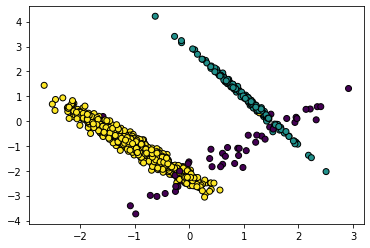

In [34]:
plt.scatter(data[:,0],data[:,1], c=label, linewidth=1, edgecolor='black')

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5)

In [36]:
smoted_data, smoted_label = smote.fit_resample(data, label)

In [37]:
data.shape

(1000, 2)

In [38]:
smoted_data.shape

(2382, 2)

In [39]:
print('원본 데이터의 클래스 비율 \n{}'.format(pd.get_dummies(label).sum()))
print('\nSMOTE 결과 \n{}'.format(pd.get_dummies(smoted_label).sum()))

원본 데이터의 클래스 비율 
0     54
1    152
2    794
dtype: int64

SMOTE 결과 
0    794
1    794
2    794
dtype: int64


In [40]:
#랜덤샘플링보다는 SMOTE방식을 더 많이 이용함(공평하게 통계를 내기위해서)

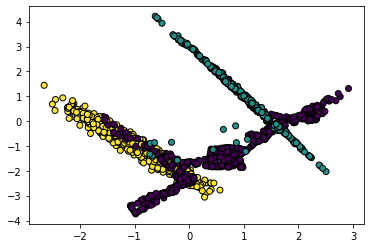

In [41]:
plt.scatter(smoted_data[:,0], smoted_data[:,1],
            c=smoted_label, linewidth=1, edgecolor='black'
)

In [42]:
from sklearn.datasets import load_digits

In [43]:
digits = load_digits()

In [44]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [45]:
digits.data.shape

(1797, 64)

In [46]:
data = digits.data
label = digits.target

Label : 0


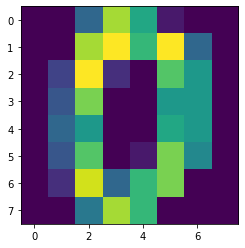

In [47]:
plt.imshow(data[0].reshape(8,8))
print('Label : {}'.format(label[0]))

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [49]:
new_data = pca.fit_transform(data)

In [50]:
data.shape

(1797, 64)

In [51]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [52]:
new_data.shape

(1797, 2)

In [53]:
new_data[0]

array([-1.25946556, 21.27488291])

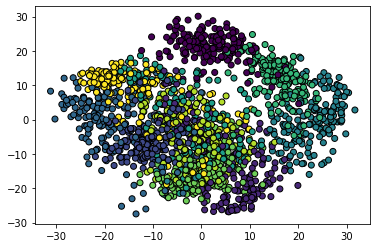

In [54]:
plt.scatter(new_data[:,0], new_data[:,1], c=label,
            linewidth=1, edgecolor ='black'
            )

In [55]:
data = pd.read_csv('abalone.txt', header=None, names = abalone_columns)

In [56]:
label = data['Sex']

In [57]:
label.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
label_encoded_label = le.fit_transform(label)

In [60]:
label_encoded_label

array([2, 2, 0, ..., 2, 0, 2])

In [61]:
label_encoded_label.reshape(-1,1)

array([[2],
       [2],
       [0],
       ...,
       [2],
       [0],
       [2]])

In [62]:
result = pd.DataFrame(data = np.concatenate([label.values.reshape((-1,1)), 
                                            label_encoded_label.reshape((-1, 1))], axis=1),
                                            columns=['label', 'label_encoded'])

In [63]:
result

,label,label_encoded
0,M,2
1,M,2
2,F,0
3,M,2
4,I,1
...,...,...
4172,F,0
4173,M,2
4174,M,2
4175,F,0


In [64]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)   #True(디폴트)는 매트릭스, False는 배열로 나옴

In [65]:
one_hot_encoded = ohe.fit_transform(label.values.reshape((-1,1)))

In [66]:
print(one_hot_encoded)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [67]:
from sklearn.datasets import load_wine
wine = load_wine()

In [68]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [69]:
data = wine.data
label = wine.target
columns = wine.feature_names

In [70]:
data = pd.DataFrame(data, columns = columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [71]:
data.shape

(178, 13)

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [73]:
data

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [75]:
data.shape

(178, 2)

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [77]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [78]:
cluster = kmeans.predict(data)

C:\Users\a\AppData\Local\Temp/ipykernel_3852/4225662073.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(data[:,0],data[:,1], c=cluster,


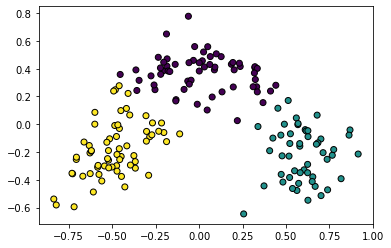

In [79]:
plt.scatter(data[:,0],data[:,1], c=cluster,
            lineWidth=1, edgecolor='black')

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
!pip install mglearn

(26, 2)


C:\Users\a\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


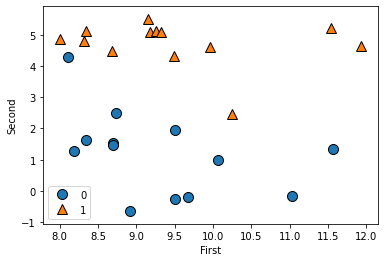

In [82]:
# 지도 학습 알고리즘
import mglearn

X, y = mglearn.datasets.make_forge()    #데이터 생성(X = feature, y = label(색이나 모양))

mglearn.discrete_scatter(X[:,0], X[:,1], y)     #X0 : 가로축 , X1 : 세로축
plt.xlabel('First')
plt.ylabel('Second')
plt.legend()
print(X.shape)

(40, 1)


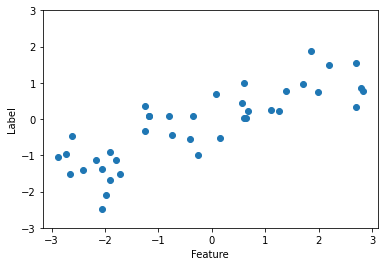

In [83]:
X, y = mglearn.datasets.make_wave(n_samples=40)    #샘플 갯수

plt.plot(X, y, 'o')
plt.ylim(-3, 3)

plt.xlabel('Feature')
plt.ylabel('Label')
print(X.shape)

In [84]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [85]:
cancer.data.shape

(569, 30)

In [86]:
# cancer.target       #양성 malignant #음성 benign
# cancer.target_names
# cancer.feature_names

C:\Users\a\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


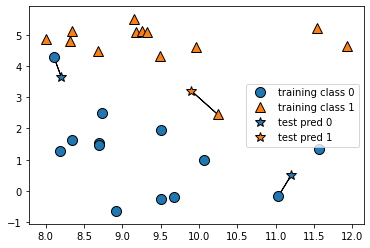

In [87]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\a\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


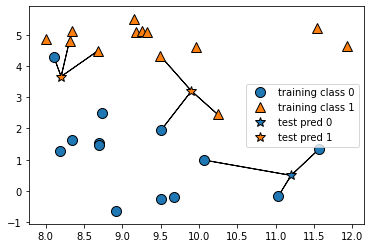

In [88]:
mglearn.plots.plot_knn_classification(n_neighbors=3)      # 보통 과반수를 위해서 홀수로 숫자를 지정한다

In [89]:
from sklearn.model_selection import train_test_split               #train 및 test로 쪼갠다
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

C:\Users\a\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [90]:
from sklearn.neighbors import KNeighborsClassifier         #분류로 클래시파이어 사용
clf = KNeighborsClassifier(n_neighbors=1)

In [91]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [92]:
clf.predict(X_test)                #예측치 계산

array([1, 0, 1, 0, 1, 0, 0])

In [93]:
clf.score(X_test, y_test)            #train과 test가 85% 정도 일치한다는 의미

0.8571428571428571

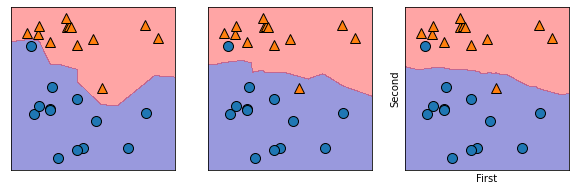

In [94]:
fig, axes = plt.subplots(1,3, figsize=(10,3))  #fig 그림판 자체의 객체, subplots 그림을 여러개, figsize 그림사이즈, axes 축
for n_neighbors, ax in zip([1,3,9], axes):
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    plt.xlabel('First')
    plt.ylabel('Second')

In [95]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))        #학습 정확도
    test_accuracy.append(clf.score(X_test, y_test))          #테스트 정확도

In [96]:
print(training_accuracy)
print(test_accuracy)

[1.0, 0.9671361502347418, 0.9671361502347418, 0.9553990610328639, 0.9483568075117371, 0.9483568075117371, 0.9436619718309859, 0.9413145539906104, 0.9460093896713615, 0.9413145539906104]
[0.9230769230769231, 0.9020979020979021, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]


Text(0, 0.5, 'Accuracy')

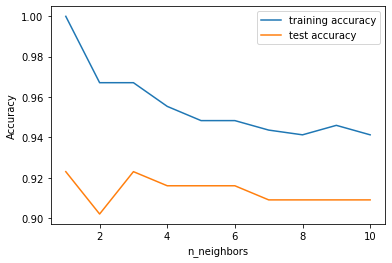

In [97]:
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

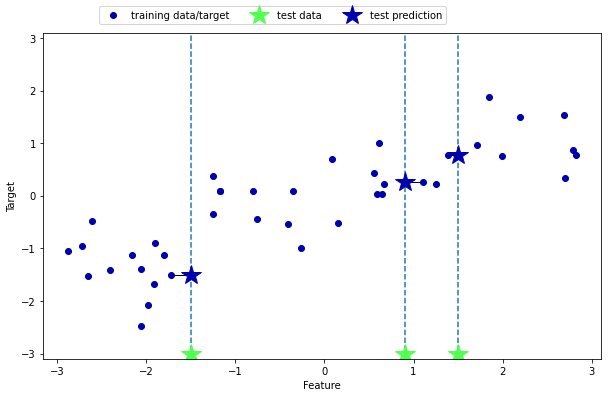

In [98]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

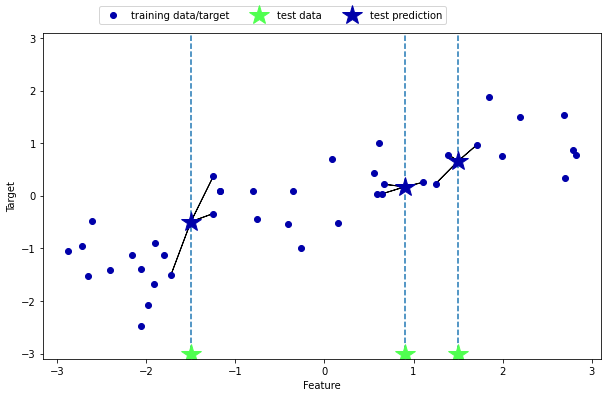

In [99]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [100]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [101]:
reg.predict(X_test)
reg.score(X_test, y_test)

0.8344172446249605

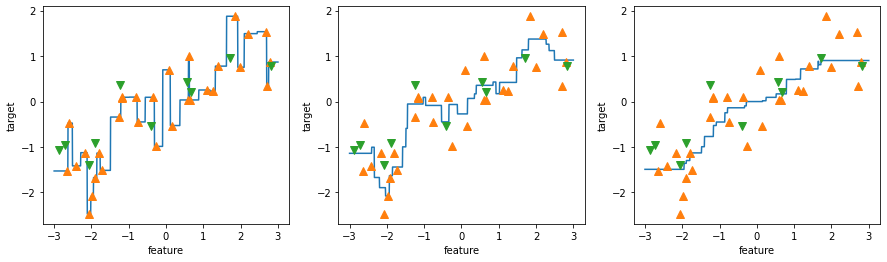

In [102]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1,3,9], axes):
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))                          #선연결
    ax.plot(X_train, y_train, '^', markersize=8)              #삼각형
    ax.plot(X_test, y_test, 'v', markersize=8)                #초록삼각형끼리 연결했을때 얼마나 선이랑 수렴하는지에 따라 정확도가 달라짐
    
    ax.set_xlabel('feature')
    ax.set_ylabel('target')

w[0]: 0.393906  b: -0.031804


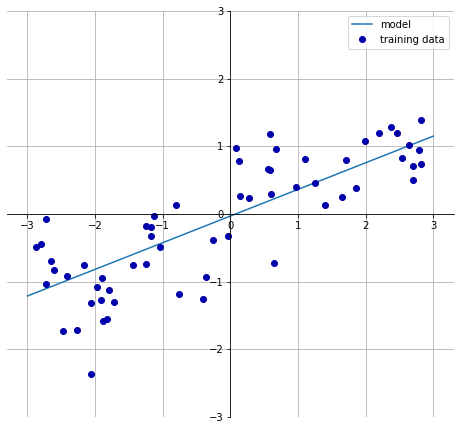

In [103]:
mglearn.plots.plot_linear_regression_wave()

In [104]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)     #쪼개고

lr = LinearRegression().fit(X_train, y_train)  #학습을 시켜놓는다

In [105]:
print(lr.score(X_train,y_train))      #훈련 정확도
print(lr.score(X_test, y_test))       #테스트 정확도

0.6700890315075756
0.65933685968637


In [106]:
print(lr.coef_)           #기울기
print(lr.intercept_)      #절편

[0.39390555]
-0.031804343026759746


In [107]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

C:\Users\a\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [108]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9520519609032729
0.6074721959665845


In [109]:
# Ridge / 릿지(회귀) *규제(제약)가 추가됨

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.885796658517094
0.7527683481744754


In [110]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train) #알파값이 높을수록 제약이 높음 그래서 학습이 잘됨 (alpha10은 자유도 높음)

print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))

0.7882787115369615
0.6359411489177311


In [111]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))

0.9282273685001986
0.772206793647982


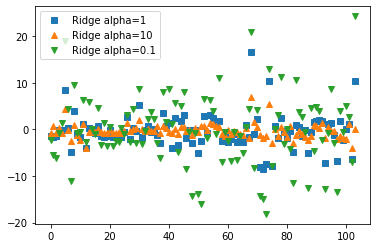

In [112]:
#제약(alpha)을 많이 걸면 데이터가 튀지않음(편차가 적어짐)

plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.legend()

In [113]:
#Lasso 

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.29323768991114607
0.20937503255272294


In [114]:
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)

print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))

0.8962226511086497
0.7656571174549983


In [115]:
# 알파값 기본은 1이며, 1보다 이상일수록 제약이 높아지고 편차는 낮아진다, 훈련정확성은 낮아진다(테스트 정확도는 비교적 높아진다)
# 반대로 1보다 이하일수록, 제약은 낮아지고 편차는 높아진다(데이터가 튄다), 훈련정확성은 높아진다(테스트 정확도는 비교적 낮아진다)

In [116]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)

print(lasso00001.score(X_train, y_train))
print(lasso00001.score(X_test, y_test))        

0.9507158754515467
0.6437467421272709


In [117]:
lasso0 = Lasso(alpha=0, max_iter=50000).fit(X_train, y_train)

print(lasso0.score(X_train,y_train))
print(lasso0.score(X_test,y_test))

C:\Users\a\AppData\Local\Temp/ipykernel_3852/2879917668.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso0 = Lasso(alpha=0, max_iter=50000).fit(X_train, y_train)
C:\Users\a\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


0.951820862193501
0.6158830474835724


C:\Users\a\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.789e+02, tolerance: 3.233e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [118]:
lasso01 = Lasso(alpha=0.1).fit(X_train, y_train)

print(lasso01.score(X_train, y_train))
print(lasso01.score(X_test, y_test))

0.7709955157630054
0.6302009976110041


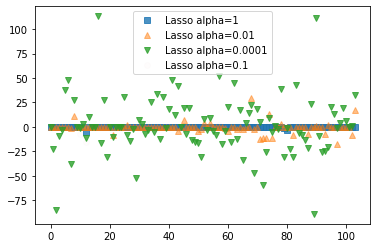

In [119]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1', alpha=0.8)
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01', alpha=0.5)
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001', alpha=0.8)
plt.plot(lasso01.coef_, 'o', label='Lasso alpha=0.1', alpha=0.01)
plt.legend()

C:\Users\a\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


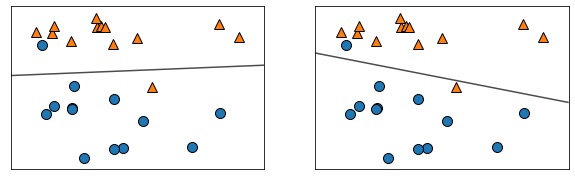

In [120]:
#분류에 대한 선형 모델
from sklearn.linear_model import LogisticRegression         #LogisticRegression은 회귀 기법을 이용해서 분류(classification)하는 거
from sklearn.svm import LinearSVC                           #

X, y = mglearn.datasets.make_forge() #샘플데이터 생성

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, alpha=0.7, ax=ax)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)

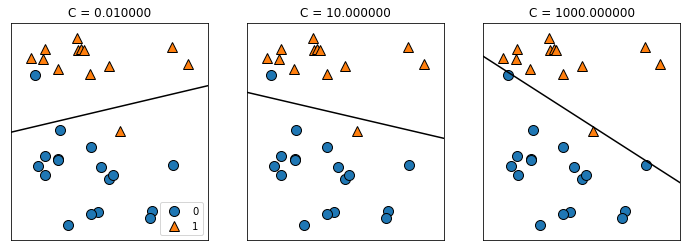

In [121]:
mglearn.plots.plot_linear_svc_regularization()           #정규화

In [122]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
logreg = LogisticRegression(max_iter = 5000).fit(X_train, y_train)

print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9624413145539906
0.965034965034965


In [123]:
#L2 제약은 (릿지) 전반적으로 제약을 걸고. 0이 되지 않음                                        #주로 릿지가 정확도가 높아서 자주사용
#L1 제약은 (라쏘) 제약이 쎄면 거의 리니어리그리션에 가까워진다. 0에 가까워질수 있음.

In [124]:
logreg100 = LogisticRegression(max_iter=5000, C=100).fit(X_train, y_train)

print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))             #C 제약은 ALPHA와 반대로 숫자가 클수록 제약이 낮아짐

0.9788732394366197
0.965034965034965


In [125]:
logreg001 = LogisticRegression(max_iter=5000, C=0.01).fit(X_train, y_train)

print(logreg001.score(X_train, y_train))
print(logreg001.score(X_test, y_test))             

0.9460093896713615
0.972027972027972


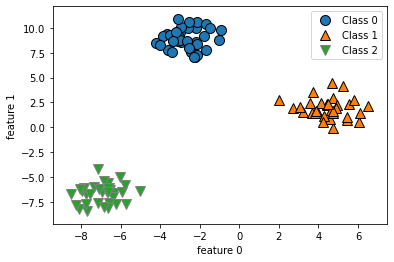

In [126]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['Class 0','Class 1', 'Class 2'])

In [127]:
linear_svm = LinearSVC().fit(X, y)

In [128]:
print(linear_svm.coef_)             #기울기

[[-0.17492485  0.23141159]
 [ 0.47621805 -0.06937266]
 [-0.18914296 -0.20399601]]


In [129]:
print(linear_svm.coef_.shape)

(3, 2)


In [130]:
print(linear_svm.intercept_)        #y절편

[-1.07745449  0.13140637 -0.08604813]


In [131]:
print(linear_svm.intercept_.shape)

(3,)


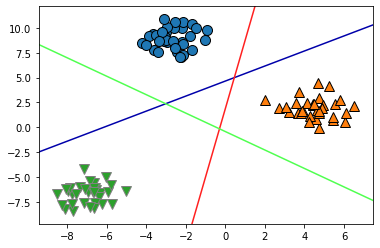

In [132]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

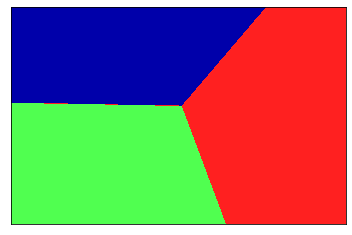

In [133]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True)

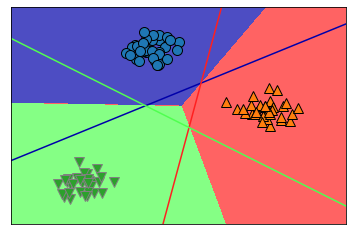

In [134]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

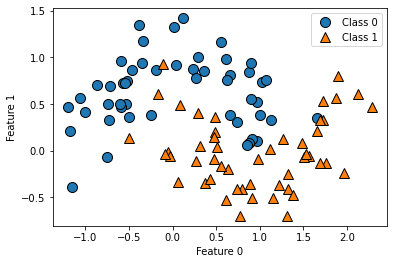

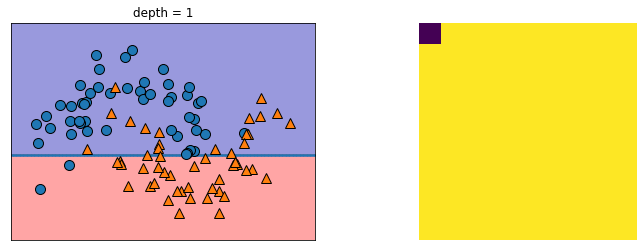

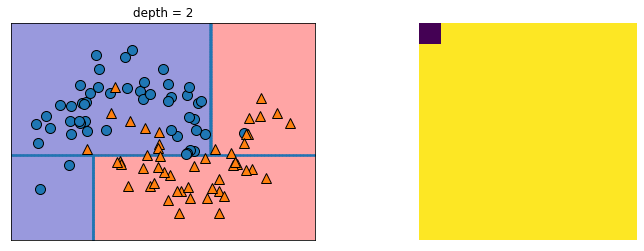

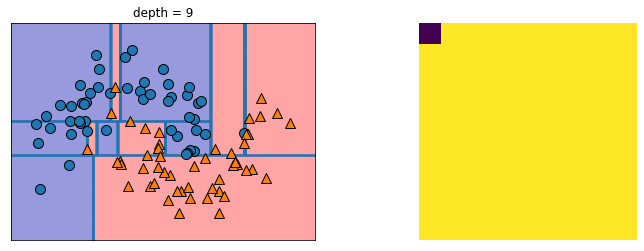

In [135]:
# Tree 계열 분류 알고리즘

mglearn.plots.plot_tree_progressive()

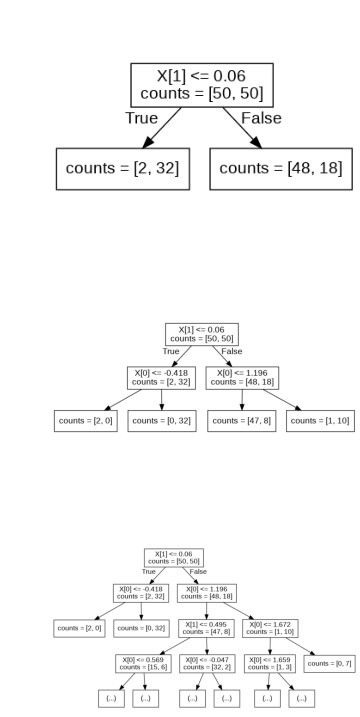

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=42
)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [138]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.9300699300699301


In [139]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)                 #디폴트보다는 유연하게 트리를 만든다고 볼수있다
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [140]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))                      

0.9953051643192489
0.951048951048951


[Text(0.5657894736842105, 0.9, 'mean concave points <= 0.051\ngini = 0.467\nsamples = 426\nvalue = [158, 268]\nclass = B'),
 Text(0.34210526315789475, 0.7, 'worst radius <= 16.83\ngini = 0.113\nsamples = 267\nvalue = [16, 251]\nclass = B'),
 Text(0.21052631578947367, 0.5, 'radius error <= 0.626\ngini = 0.039\nsamples = 249\nvalue = [5, 244]\nclass = B'),
 Text(0.10526315789473684, 0.3, 'worst smoothness <= 0.178\ngini = 0.024\nsamples = 246\nvalue = [3, 243]\nclass = B'),
 Text(0.05263157894736842, 0.1, 'gini = 0.016\nsamples = 245\nvalue = [2, 243]\nclass = B'),
 Text(0.15789473684210525, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = A'),
 Text(0.3157894736842105, 0.3, 'symmetry error <= 0.025\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = A'),
 Text(0.2631578947368421, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = A'),
 Text(0.3684210526315789, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = B'),
 Text(0.47368421052631576, 0.5, 'worst texture <= 19.91\ng

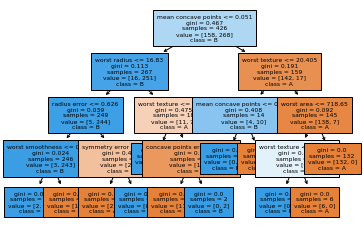

In [141]:
from sklearn.tree import plot_tree            #트리 그리는것

plot_tree(tree, class_names=['A','B'], filled=True, fontsize=6,
         feature_names = cancer.feature_names)


In [142]:
print(tree.feature_importances_)                #뭐가 중요한지 결정이 안나면, 0으로 나타남

[0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]


Text(0, 0.5, 'Price')

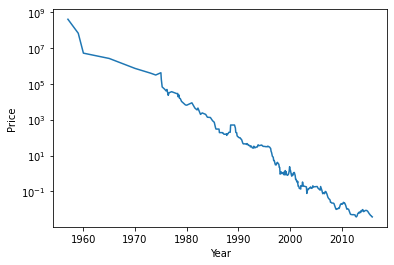

In [143]:
import os
ram_price = pd.read_csv('ram_price.csv')

plt.semilogy(ram_price.date, ram_price.price)
# plt.yticks(fontname = 'Arial')
plt.xlabel('Year')
plt.ylabel('Price')

In [144]:
ram_price

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


In [145]:
from sklearn.tree import DecisionTreeClassifier

data_train = ram_price[ram_price.date < 2000]
data_test = ram_price[ram_price.date >= 2000]

In [146]:
X_train = data_train.date.to_numpy()[:,np.newaxis]

In [147]:
y_train = np.log(data_train.price)

In [148]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [149]:
X_all = ram_price.date.to_numpy()[:,np.newaxis]

In [150]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [151]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [152]:
price_tree

array([4.11041792e+08, 6.79477250e+07, 5.24288000e+06, 2.64241200e+06,
       7.34003000e+05, 3.99360000e+05, 3.14573000e+05, 4.21888000e+05,
       1.80224000e+05, 6.75840000e+04, 4.99200000e+04, 4.07040000e+04,
       4.89600000e+04, 2.30400000e+04, 3.20000000e+04, 3.68000000e+04,
       2.80000000e+04, 2.94400000e+04, 1.92000000e+04, 2.40000000e+04,
       1.60000000e+04, 1.52000000e+04, 1.05280000e+04, 6.70400000e+03,
       6.48000000e+03, 8.80000000e+03, 4.47900000e+03, 3.52000000e+03,
       4.46400000e+03, 1.98000000e+03, 2.39600000e+03, 1.98000000e+03,
       1.37900000e+03, 1.33100000e+03, 8.80000000e+02, 7.20000000e+02,
       5.50000000e+02, 4.20000000e+02, 3.50000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 3.00000000e+02, 3.00000000e+02,
       3.00000000e+02, 3.00000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.90000000e+02, 1.90000000e+02, 1.90000000e+02,
       1.90000000e+02, 1.76000000e+02, 1.76000000e+02, 1.57000000e+02,
      

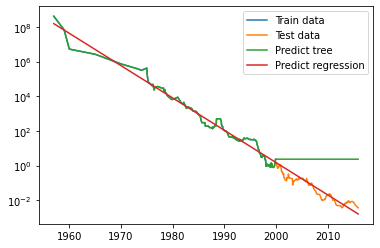

In [153]:
plt.semilogy(data_train.date, data_train.price, label='Train data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_price.date, price_tree, label='Predict tree')
plt.semilogy(ram_price.date, price_lr, label='Predict regression')                  #MAE라고 보면된다

plt.legend()

In [154]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise=0.25, random_state=3)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [156]:
forest = RandomForestClassifier(n_estimators=5, random_state=2) #100이 default(100개의 나무)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

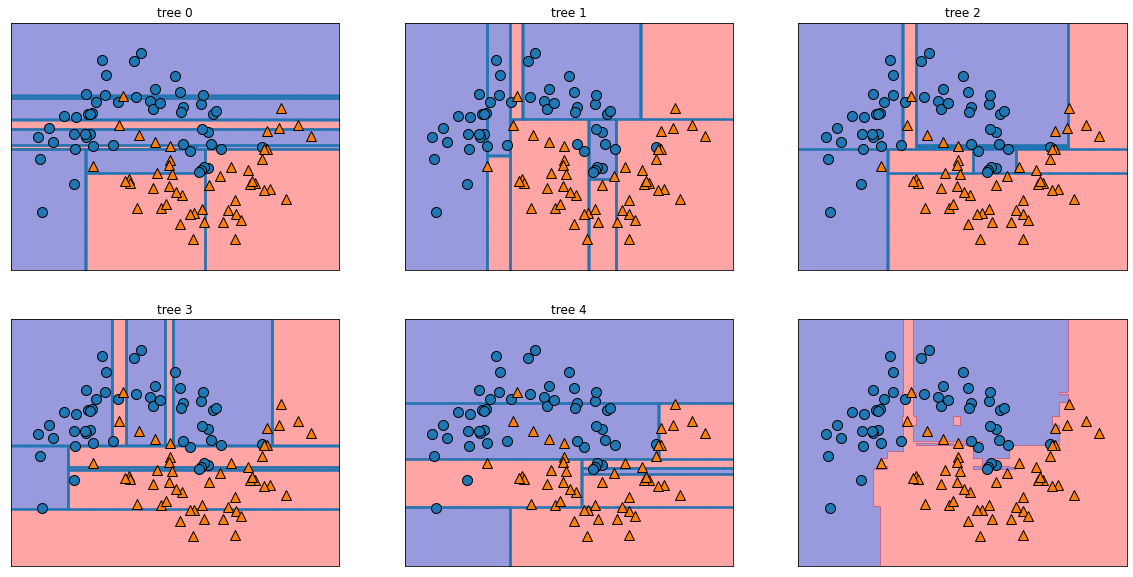

In [157]:
fig, axes = plt.subplots(2,3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=0.4)
mglearn.discrete_scatter(X[:,0],X[:,1], y)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [159]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.972027972027972


In [160]:
print(forest.feature_importances_)

[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]


In [161]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

In [162]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [163]:
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

1.0
0.965034965034965


In [164]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)     #다음 단계만에 결정함(5까지만해도 충분함), 원하는 결과 빨리, 메모리 적게듬
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.9906103286384976
0.972027972027972


In [165]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate = 0.1)
gbrt.fit(X_train, y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

1.0
0.965034965034965


Text(0, 0.5, 'feature 1')

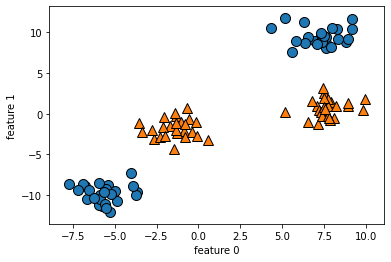

In [166]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

C:\Users\a\AppData\Local\Temp/ipykernel_3852/1149562123.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


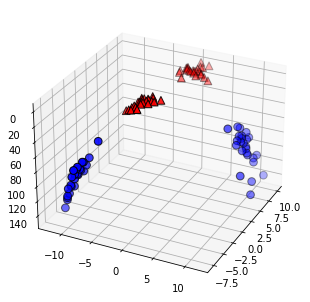

In [172]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60, edgecolor='k')

In [174]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [175]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))                       #군집이 잘되어있으면 SVC기법을 이용하는게 정확도가 높고 정리가 잘됨
                                                       #군집이 잘되어있지않다면 Tree기법을 이용하는게 좋다.(Tree는 학습범위안에서만 동작되어서 한계가 있음)
                                

0.903755868544601
0.9370629370629371
